# Reusable User-Frendly Function for Portrait Plots

Notebook written by *Jiwoo Lee* (Feb. 2019)

***

- **OBJECTIVE**: Provide user-frendly and reusable function to generate portrait plot from given 2D array in type of CDMS Transisent Variable.
- **ADVENTAGE**: Users can adjust image size, colormap, font size, margin, etc., without knowing details of portrait plot generation.
- **USAGE**: Feed CDMS MV2 2-D array with customizing options to the [function](#function) to generate a portrait plot. See [below](#options) for details.

In [1]:
from __future__ import print_function

## Prepare the Notebook
Below is for embedded VCS image plotting in the Jupyter Notebook (Courtesy of *C. Doutriaux*). 

In [2]:
#
# Prepare the Notebook
#
import tempfile
import base64
import pcmdi_metrics.graphics.portraits
class PortraitNotebook(pcmdi_metrics.graphics.portraits.Portrait):
    def __init__(self,x,*args, **kargs):
        super(PortraitNotebook, self).__init__(*args, **kargs)
        self.x = x
    def _repr_png_(self):
        tmp = tempfile.mktemp() + ".png"
        self.x.png(tmp)
        f = open(tmp, "rb")
        st = f.read()
        return st

## User-friendly reuseable function to generate a portrait plot as static image<a id="function"></a>

User provides cdms MV2 2D array to the function with custom options if needed. Below code is basically a wrapper of existing portrait plot generation, but help users easily customize their plots, using various options listed below. Users can adjust image size, colormap, font size, margin, etc., without learning details of portrait plot generation.

### Input<a id="options"></a>

- <span style="color:steelblue">**stat_xy**</span>: *cdms2 MV2 2D array* with proper axes decorated, values to visualize.
- <span style="color:steelblue">**imgName**</span>: *string*, file name for PNG image file (e.g., `'YOUR_PLOT.png'` or `'YOUR_PLOT'`. If `.png` is not included, it will be added, so no worry).
- <span style="color:steelblue">**plotTilte**</span>: *string*, text to show above plot as its title (optional)
- <span style="color:steelblue">**img_length**</span>: *integer*, pixels for image file length. default=800.
- <span style="color:steelblue">**img_height**</span>: *integer*, pixels for image file height. default=600.
- <span style="color:steelblue">**colormap**</span>: *string* or actual *VCS colormap*. Default is 'viridis' that is default in VCS.
- <span style="color:steelblue">**clevels**</span>: *list* of numbers (int or float). Colorbar levels. If not given automatically generated.
- <span style="color:steelblue">**ccolors**</span>: *list* of colors. If not given automatically generate.
- <span style="color:steelblue">**xtic_textsize**</span>: *int*, size of text for x-axis tic. If not given automatically generated.
- <span style="color:steelblue">**ytic_textsize**</span>: *int*, size of text for y-axis tic. If not given automatically generated.
- <span style="color:steelblue">**parea**</span>: *list* or *tuple* of float numbers between 0 to 1. Plotting area: (x1, x2, y1, y2). If not given automatically placed.
- <span style="color:steelblue">**missing_color**</span>: *string* or *color code* (tuple or list of R, G, B, alpha). Color for missing data box. Default is 'black'
- <span style="color:steelblue">**Annotate**</span>: *bool*, default=False. If Annotate, show numbers in individual boxes.
- <span style="color:steelblue">**stat_xy_annotate**</span>: *cdms2 MV2 2D array* with proper axes decorated. Only needed when number to show as value annotated is not corresponding to the colormap. Not even bother when Annotate=False. For example, color for values those normalized by median, while annotate actual value for metrics.
- <span style="color:steelblue">**num_box_partitioning**</span>: *integer*. It defines how many partitioning in a box. e.g., 4 indicates 4 triangles in each box. Default=1, should be less equal than 4.
- <span style="color:steelblue">**stat_xy_2**</span>: *cdms2 MV2 2D array*. Stat for 2nd triangle in box. Default=None
- <span style="color:steelblue">**stat_xy_3**</span>: *cdms2 MV2 2D array*. Stat for 3rd triangle in box. Default=None
- <span style="color:steelblue">**stat_xy_4**</span>: *cdms2 MV2 2D array*. Stat for 4th triangle in box. Default=None
- <span style="color:steelblue">**logo**</span>: *bool*, default=True. If False, CDAT logo turned off 
- <span style="color:steelblue">**GridMeshLine**</span>: *bool*, default=True. If False, no lines for boundary of individual boxes

### Output

- **PNG image file**

In [3]:
import pcmdi_metrics.graphics.portraits
import vcs
import sys

def plot_portrait(
    stat_xy,  # array to visualize
    imgName='portrait_plot',  # file name
    plotTitle=None,  # title string on top
    img_length=800, img_height=600,  # image size in pixel
    colormap='viridis', clevels=None, ccolors=None,  # colormap and levels
    xtic_textsize=None, ytic_textsize=None,  # font size for axes tic labels
    parea=None,  # plotting area in ratio, in purpose of margin control
    missing_color='black',  # color for missing data box
    Annotate=False, stat_xy_annotate=None,  # annotation (showing value number in each box)
    num_box_partitioning=1, stat_xy_2=None, stat_xy_3=None, stat_xy_4=None,  # additional triangle
    logo=True, GridMeshLine=True,  # miscellaneous
    ):
    """ 
    NOTE:
    Input
    - stat_xy: cdms2 MV2 2D array with proper axes decorated, values to visualize.
    - imgName: string, file name for PNG image file (e.g., 'YOUR_PLOT.png' or 'YOUR_PLOT'. If .png is not included, it will be added, so no worry).
    - plotTilte: string
    - img_length: integer, pixels for image file length. default=800.
    - img_height: integer, pixels for image file height. default=600.
    - colormap: string or actual VCS colormap. Default is 'viridis' that is default in VCS.
    - clevels: list of numbers (int or float). Colorbar levels. If not given automatically generated.
    - ccolors: list of colors. If not given automatically generate.
    - xtic_textsize: int, size of text for x-axis tic. If not given automatically generated.
    - ytic_textsize: int, size of text for y-axis tic. If not given automatically generated.
    - parea: list or tuple of float numbers between 0 to 1. Plotting area: (x1, x2, y1, y2). If not given automatically placed.
    - missing_color: string or color code (tuple or list of R, G, B, alpha). Color for missing data box. Default is 'black'
    - Annotate: bool, default=False. If Annotate, show numbers in individual boxes.
    - stat_xy_annotate: cdms2 MV2 2D array with proper axes decorated. Only needed when number to show as value annotated is not corresponding to the colormap. Not even bother when Annotate=False. For example, color for values those normalized by median, while annotate actual value for metrics.
    - num_box_partitioning: integer. How many partitioning in a box? e.g., 4: 4 triangles in each box. Default=1, should be less equal than 4.
    - stat_xy_2: cdms2 MV2 2D array. Stat for 2nd triangle in box. Default=None
    - stat_xy_3: cdms2 MV2 2D array. Stat for 3rd triangle in box. Default=None
    - stat_xy_4: cdms2 MV2 2D array. Stat for 4th triangle in box. Default=None
    - logo: bool, default=True. If False, CDAT logo turned off 
    - GridMeshLine: bool, default=True. If False, no lines for boundary of individual boxes
    Output
    - PNG image file
    """
    
    # VCS Canvas
    x = vcs.init(bg=True,geometry=(img_length, img_height))
    
    # CDAT logo control
    if not logo:
        x.drawlogooff()
    
    # Set up Portrait Plot
    """
    If you are NOT using JUPYTER NOTEBOOK,
    it is okay to DEACTIVATE below line and ACTIVATE second below line,
    and skip the "Prepare the Notebook" part above.
    """
    P = PortraitNotebook(x)
    #P = pcmdi_metrics.graphics.portraits.Portrait()
    
    #
    # Preprocessing step to "decorate" the axis
    #
    axes = stat_xy.getAxisList()
    xax = [t+'  ' for t in list(axes[1][:])]
    yax = [t+'  ' for t in list(axes[0][:])]
    P.decorate(stat_xy, yax, xax)
    #
    # Customize
    #
    SET = P.PLOT_SETTINGS
    
    # Viewport on the Canvas
    if parea is not None:
        SET.x1, SET.x2, SET.y1, SET.y2 = parea
    
    # Both X (horizontal) and y (VERTICAL) ticks
    # Text table
    SET.tictable = vcs.createtexttable()
    SET.tictable.color = "black"
    # X (bottom) ticks
    # Text Orientation
    SET.xticorientation = vcs.createtextorientation()
    SET.xticorientation.angle = -90
    SET.xticorientation.halign = "right"
    if xtic_textsize:
        SET.xticorientation.height = xtic_textsize 
    # Y (vertical) ticks
    SET.yticorientation = vcs.createtextorientation()
    SET.yticorientation.angle = 0
    SET.yticorientation.halign = "right"
    if ytic_textsize:
        SET.yticorientation.height = ytic_textsize
    # We can turn off the "grid" if needed
    if GridMeshLine:
        SET.draw_mesh = "y"
    else:
        SET.draw_mesh = "n"
    # Color for missing data
    SET.missing_color = missing_color
    # Timestamp
    SET.time_stamp = None
    # Colormap
    SET.colormap = colormap
    if clevels:
        SET.levels = clevels 
    if ccolors:
        SET.fillareacolors = ccolors
    # Annotated Plot (i.e. show value number in boxes)
    if Annotate:
        SET.values.show = True
        if stat_xy_annotate is None:
            SET.values.array = stat_xy
        else:
            SET.values.array = stat_xy_annotate
    # Check before plotting
    if num_box_partitioning > 4:
        sys.exit('ERROR: num_box_partitioning should be less equal than 4')
    #
    # Plot
    #
    P.plot(stat_xy, multiple=pp_multiple(1, num_box_partitioning), x=x)
    # Add triangles if needed
    # Decorate additional arrays with empty string axes to avoid overwriting same information (if not, font will look ugly)
    xax_empty = ['  ' for t in stat_xy.getAxis(1)[:]]
    yax_empty = ['  ' for t in stat_xy.getAxis(0)[:]]
    if stat_xy_2 is not None:
        P.decorate(stat_xy_2, yax_empty, xax_empty)
        P.plot(stat_xy_2, x=x, multiple=pp_multiple(2, num_box_partitioning))
    if stat_xy_3 is not None:
        P.decorate(stat_xy_3, yax_empty, xax_empty)
        P.plot(stat_xy_3, x=x, multiple=pp_multiple(3, num_box_partitioning))
    if stat_xy_4 is not None:
        P.decorate(stat_xy_4, yax_empty, xax_empty)
        P.plot(stat_xy_4, x=x, multiple=pp_multiple(4, num_box_partitioning))
    # Plot title
    if plotTitle:
        plot_title = vcs.createtext()
        plot_title.x = .5
        plot_title.y = (SET.y2 + 1) / 2.
        plot_title.height = 30
        plot_title.halign = 'center'
        plot_title.valign = 'half'
        plot_title.color = 'black'
        plot_title.string = plotTitle
        x.plot(plot_title)
    # Save
    if imgName.split('.')[-1] not in ['PNG', 'png']:
        imgName = imgName+'.png'
    x.png(imgName)
    # Preserve original axes
    stat_xy.setAxisList(axes)
    return P


def pp_multiple(a, b):
    """
    Note a, b to a.b
    Input
    - a, b: integer
    Output
    - c: float, a.b
    """
    c = float(str(a)+'.'+str(b))
    return c

***
## Let's testing it with dummy data
Below we create a dummy array to visualize.

In [4]:
import cdms2
import genutil
import MV2
import numpy as np

In [5]:
def normalize_by_median(stat_xy):
    """ 
    NOTE:
    Input
    - stat_xy: cdms2 MV2 2D array with proper axes decorated, values to visualize.
    Output
    - stat_xy: stat_xy after normalized by median of each row
    """ 
    # Get median
    median = genutil.statistics.median(stat_xy, axis=1)[0]
    # Match shapes
    stat_xy, median = genutil.grower(stat_xy, median)
    # Normalize by median value
    median = np.array(median)
    stat_xy_normalized = MV2.divide(MV2.subtract(stat_xy,median), median)
    # Decorate axes
    stat_xy_normalized.setAxisList(stat_xy.getAxisList())
    stat_xy_normalized.id = stat_xy.id
    stat_xy = stat_xy_normalized
    return stat_xy

## Dummy data

In [6]:
# Prepare dummy data -- create random array for testing
random_array = np.random.rand(10,30)
X = cdms2.createAxis(['model_ '+str(r) for r in list(range(0,30))])
Y = cdms2.createAxis(['metric_ '+str(r) for r in list(range(0,10))])
stat_xy = MV2.array(random_array, axes=(Y,X), id='statistics')

# Plant missing value
stat_xy[5][5] = -1.e20
stat_xy = MV2.masked_where(MV2.equal(stat_xy, -1.e20), stat_xy)

# Normalize rows by its median
Normalize = True
if Normalize:
    # Normalize by median value
    stat_xy = normalize_by_median(stat_xy)

# Additional dummy data for annotate test
stat_xy_annotate = MV2.multiply(stat_xy, 2)

# Additional dummy data for additional triangles
stat_xy_2 = normalize_by_median(MV2.add(stat_xy, 2))
stat_xy_3 = normalize_by_median(MV2.add(stat_xy, 3))
stat_xy_4 = normalize_by_median(MV2.add(stat_xy, 4))
axes = stat_xy.getAxisList()
stat_xy_2.setAxisList(axes)
stat_xy_3.setAxisList(axes)
stat_xy_4.setAxisList(axes)

/Users/lee1043/anaconda2/envs/pmp_nightly_20180830/lib/python3.6/site-packages/numpy/ma/core.py:3169: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]
/Users/lee1043/anaconda2/envs/pmp_nightly_20180830/lib/python3.6/site-packages/genutil/statistics.py:1712: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  if numpy.rank(ii) > 0:
/Users/lee1043/anaconda2/envs/pmp_nightly_20180830/lib/python3.6/site-packages/numpy/ma/core.py:3201: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`,

## Portrait plot generation

### Exampe 1

/Users/lee1043/anaconda2/envs/pmp_nightly_20180830/lib/python3.6/site-packages/numpy/ma/core.py:3169: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]
/Users/lee1043/anaconda2/envs/pmp_nightly_20180830/lib/python3.6/site-packages/numpy/ma/core.py:3201: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  mout = _mask[indx]
/Users/lee1043/anaconda2/envs/pmp_nightly_20180830/lib/python3.6/site-packages/vtk/util/numpy_support.py:135: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloa

NPARAM: 3


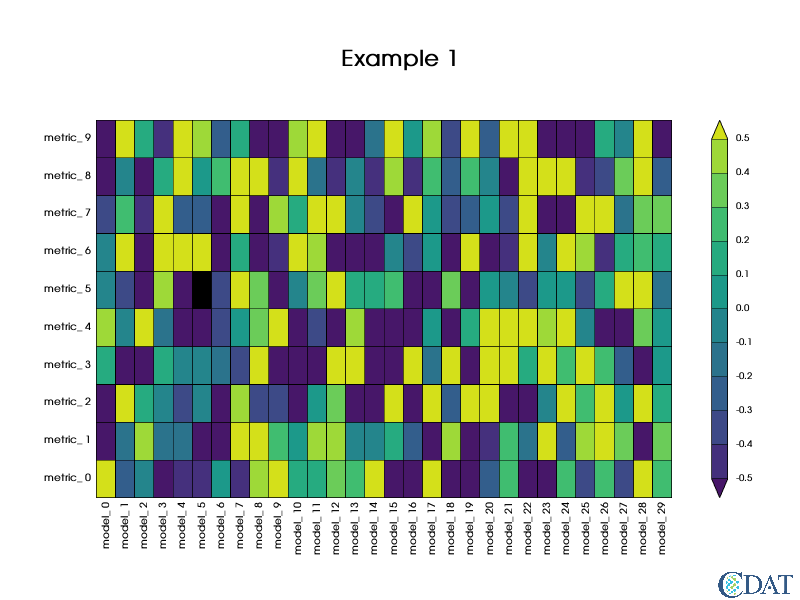

In [7]:
# Colormap to be used 
clevels = [-1.e20, -.5, -.4, -.3, -.2, -.1, 0, .1, .2, .3, .4, .5, 1.e20]
ccolors = vcs.getcolors(clevels, split=0, colors=range(16,240))
# Generate plot
plot_portrait(stat_xy, imgName='pp_example1.png',
              plotTitle='Example 1',
              clevels=clevels, ccolors=ccolors
              )

### Example 2
- Add title
- Adjust margin
- Change missing box color to white
- Add number annotation

/Users/lee1043/anaconda2/envs/pmp_nightly_20180830/lib/python3.6/site-packages/numpy/ma/core.py:3169: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]
/Users/lee1043/anaconda2/envs/pmp_nightly_20180830/lib/python3.6/site-packages/numpy/ma/core.py:3201: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  mout = _mask[indx]
/Users/lee1043/anaconda2/envs/pmp_nightly_20180830/lib/python3.6/site-packages/vtk/util/numpy_support.py:135: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloa

NPARAM: 3


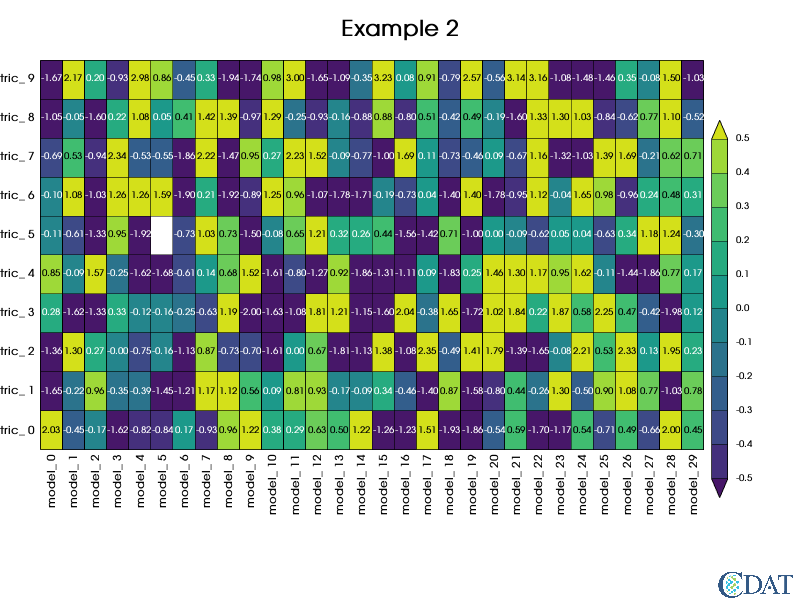

In [8]:
plot_portrait(stat_xy, imgName='pp_example2.png', 
        plotTitle='Example 2',
        clevels=clevels, ccolors=ccolors,
        xtic_textsize=15, ytic_textsize=15,
        parea=(.05, .88, .25, .9),
        missing_color='white',
        Annotate=True,
        GridMeshLine=True,
        stat_xy_annotate=stat_xy_annotate)

### Example 3
- Add triangels

/Users/lee1043/anaconda2/envs/pmp_nightly_20180830/lib/python3.6/site-packages/numpy/ma/core.py:3169: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]
/Users/lee1043/anaconda2/envs/pmp_nightly_20180830/lib/python3.6/site-packages/numpy/ma/core.py:3201: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  mout = _mask[indx]
/Users/lee1043/anaconda2/envs/pmp_nightly_20180830/lib/python3.6/site-packages/vtk/util/numpy_support.py:135: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloa

NPARAM: 3


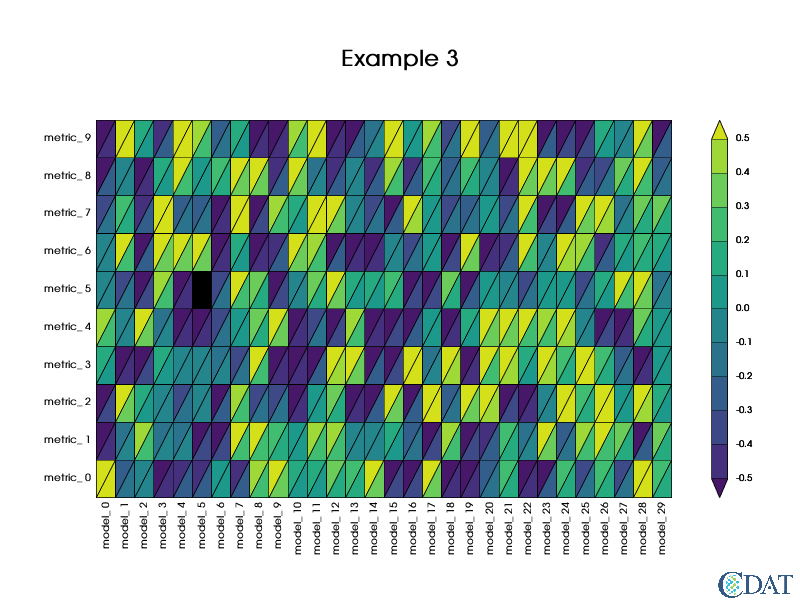

In [9]:
plot_portrait(stat_xy, imgName='pp_example3.png',
        plotTitle='Example 3',
        clevels=clevels, ccolors=ccolors,
        num_box_partitioning=2,
        stat_xy_2=stat_xy_2,
        GridMeshLine=True)

### Example 4
- Add more triangles
- Change (increase, in this case) image size
- Change font size for axes tic labels
- Hide grid lines

/Users/lee1043/anaconda2/envs/pmp_nightly_20180830/lib/python3.6/site-packages/numpy/ma/core.py:3169: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]
/Users/lee1043/anaconda2/envs/pmp_nightly_20180830/lib/python3.6/site-packages/numpy/ma/core.py:3201: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  mout = _mask[indx]
/Users/lee1043/anaconda2/envs/pmp_nightly_20180830/lib/python3.6/site-packages/vtk/util/numpy_support.py:135: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloa

NPARAM: 3


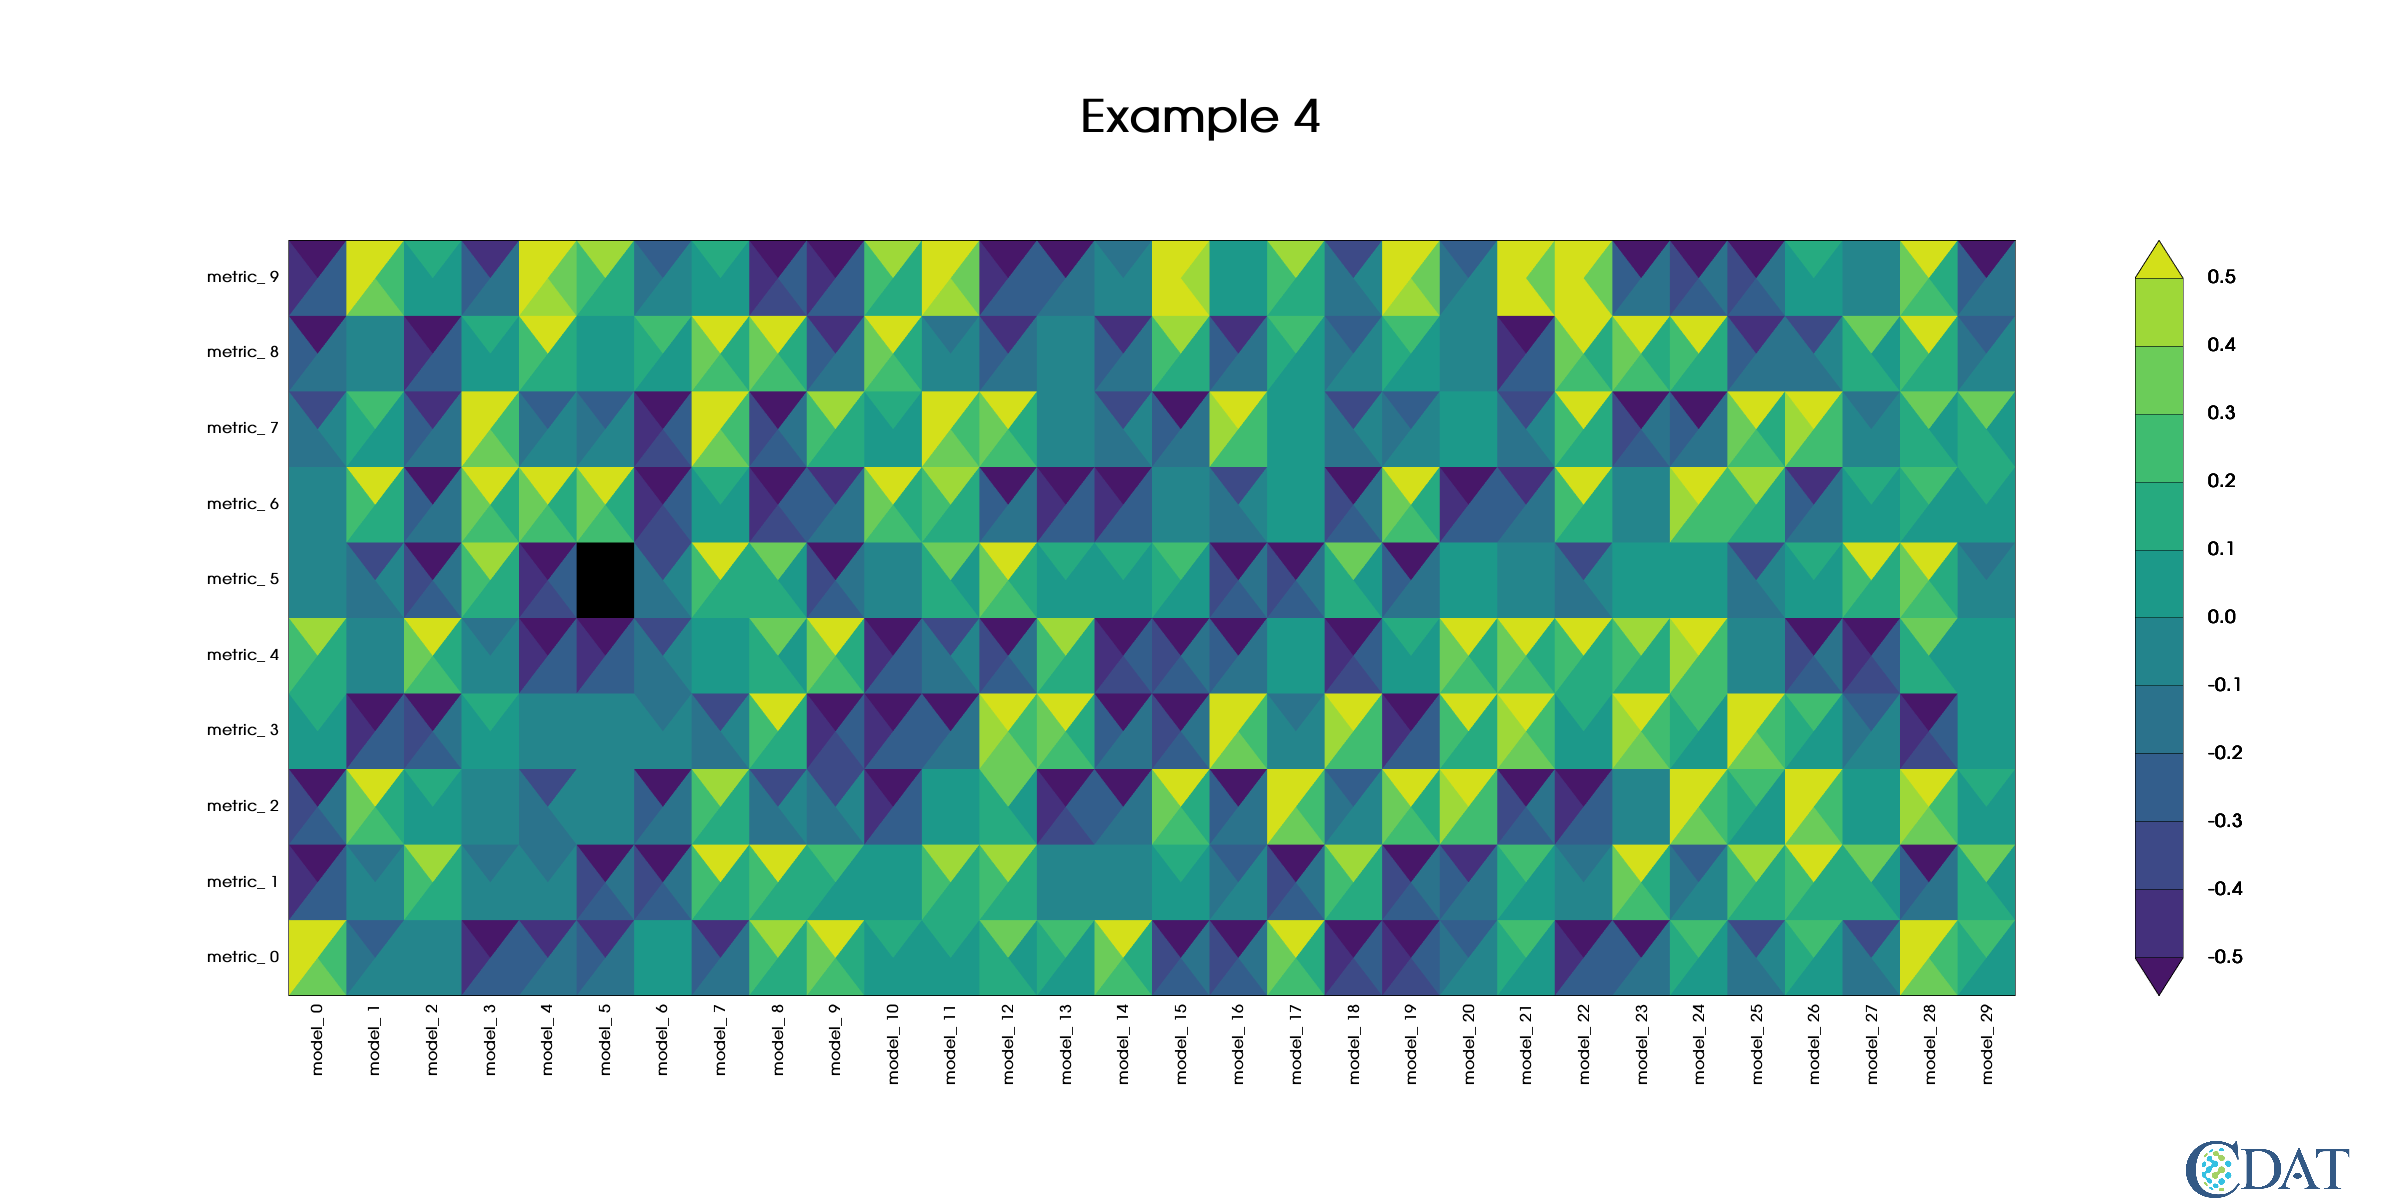

In [10]:
plot_portrait(
    stat_xy,
    imgName='pp_example4.png',
    plotTitle='Example 4',
    img_length=2400, img_height=1200,
    clevels=clevels, ccolors=ccolors,
    xtic_textsize=10, ytic_textsize=10,
    num_box_partitioning=4,
    stat_xy_2=stat_xy_2,
    stat_xy_3=stat_xy_3,
    stat_xy_4=stat_xy_4,
    GridMeshLine=False)

### Example 5
- Change colormap
- Missing box as grey
- Turn off CDAT logo

/Users/lee1043/anaconda2/envs/pmp_nightly_20180830/lib/python3.6/site-packages/numpy/ma/core.py:3169: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]
/Users/lee1043/anaconda2/envs/pmp_nightly_20180830/lib/python3.6/site-packages/numpy/ma/core.py:3201: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  mout = _mask[indx]
/Users/lee1043/anaconda2/envs/pmp_nightly_20180830/lib/python3.6/site-packages/vtk/util/numpy_support.py:135: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloa

NPARAM: 3


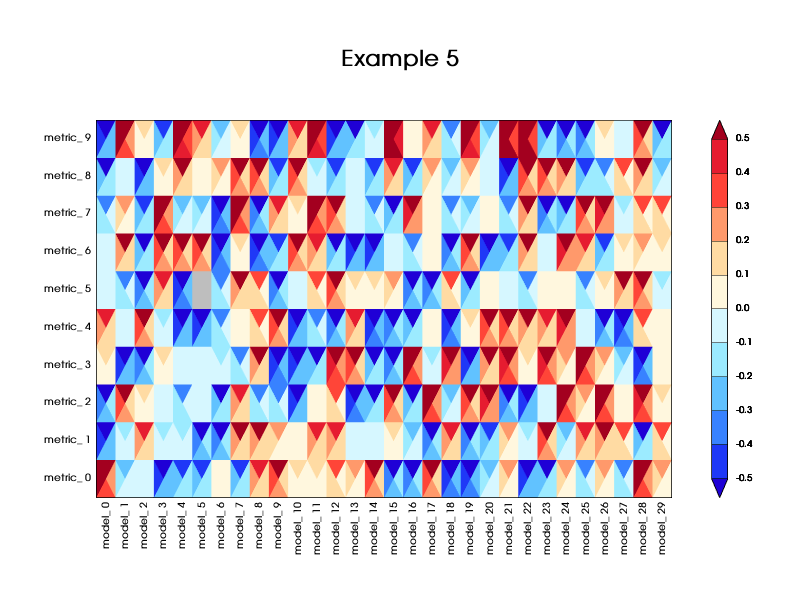

In [11]:
colormap = 'bl_to_darkred'

plot_portrait(stat_xy, imgName='pp_example5.png', plotTitle='Example 5',
        colormap=colormap, clevels=clevels, ccolors=ccolors,
        missing_color='grey', logo=False,
        num_box_partitioning=4,
        stat_xy_2=stat_xy_2,
        stat_xy_3=stat_xy_3,
        stat_xy_4=stat_xy_4,
        GridMeshLine=False)